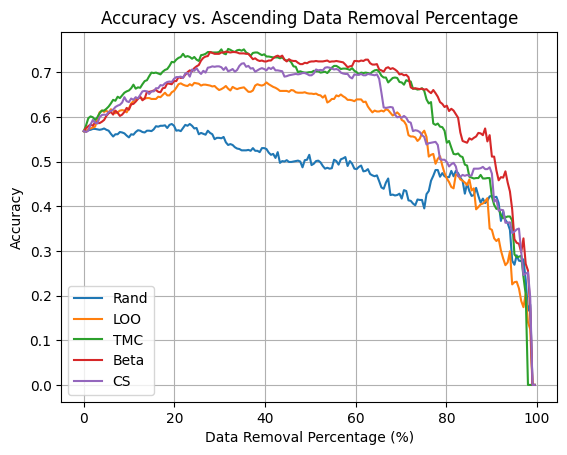

The weighted accuracy drop for Rand is 0.112
The weighted accuracy drop for LOO is -0.166
The weighted accuracy drop for TMC is -0.371
The weighted accuracy drop for Beta is -0.304
The weighted accuracy drop for CS is -0.251


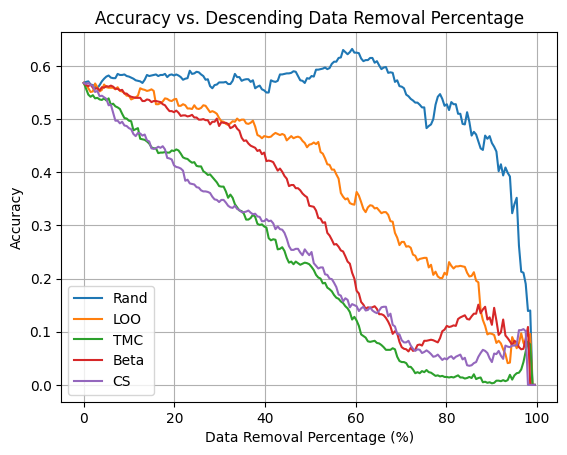

The weighted accuracy drop for Rand is 0.011
The weighted accuracy drop for LOO is 0.327
The weighted accuracy drop for TMC is 0.714
The weighted accuracy drop for Beta is 0.436
The weighted accuracy drop for CS is 0.672


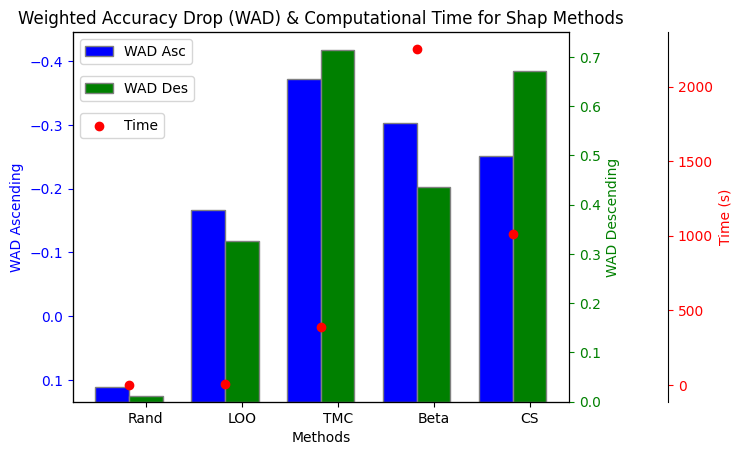

In [1]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
import torch

train_size = 1000
train_start = 0
train_size_batch = 200
dev_size = 400
test_size = 1000
np.random.seed(0)
torch.manual_seed(0)

# Load data
X_train, y_train_clean, X_dev, y_dev, X_test, y_test = load_data(train_size, dev_size, test_size)
y_train, flip_indices = flip_labels(y_train_clean, flip_fraction=0.3)
X_train_batch = X_train[train_start:train_start+train_size_batch]
y_train_batch = y_train[train_start:train_start+train_size_batch]

# Load the results
vals_loo = np.load('data/vals_time/vals_loo.npy', allow_pickle=True)
vals_tmc = np.load('data/vals_time/vals_tmc.npy', allow_pickle=True)
vals_beta = np.load('data/vals_time/vals_beta.npy', allow_pickle=True)
vals_cs = np.load('data/vals_time/vals_cs.npy', allow_pickle=True)
time_loo = np.load('data/vals_time/time_loo.npy', allow_pickle=True)
time_tmc = np.load('data/vals_time/time_tmc.npy', allow_pickle=True)
time_beta = np.load('data/vals_time/time_beta.npy', allow_pickle=True)
time_cs = np.load('data/vals_time/time_cs.npy', allow_pickle=True)

# To dictionary
vals_loo = vals_loo.item()
vals_tmc = vals_tmc.item()
vals_beta = vals_beta.item()
vals_cs = vals_cs.item()

# Create vals_rand dictionary
vals_rand = {}
for i in range(train_size_batch):
    vals_rand[i] = np.random.rand()
time_rand = 0

# Plot the results
# Ascending
acc_rand_asc, acc_loo_asc, acc_tmc_asc, acc_beta_asc, acc_cs_asc, _ = shap_comparison(
    X_train_batch, y_train_batch, X_test, y_test,
    remove_high_value=False,
    vals_rand=vals_rand,
    vals_loo=vals_loo,
    vals_tmc=vals_tmc,
    vals_beta=vals_beta,
    vals_cs=vals_cs)

# Descending
acc_rand_des, acc_loo_des, acc_tmc_des, acc_beta_des, acc_cs_des, _ = shap_comparison(
    X_train_batch, y_train_batch, X_test, y_test,
    remove_high_value=True,
    vals_rand=vals_rand,
    vals_loo=vals_loo,
    vals_tmc=vals_tmc,
    vals_beta=vals_beta,
    vals_cs=vals_cs)

# Weighted Accuracy Drop & Computational Time Bar Chart for Shap Methods
methods = ['Rand', 'LOO', 'TMC', 'Beta', 'CS']
acc_values_asc = [acc_rand_asc, acc_loo_asc, acc_tmc_asc, acc_beta_asc, acc_cs_asc]
acc_values_des = [acc_rand_des, acc_loo_des, acc_tmc_des, acc_beta_des, acc_cs_des]
time_values = [time_rand, time_loo, time_tmc, time_beta, time_cs]

barWidth = 0.35
r1 = np.arange(len(acc_values_asc))
r2 = [x + barWidth for x in r1]
r_time = [x + barWidth/2 for x in r1]

fig, ax1 = plt.subplots()

ax1.set_ylim([max(acc_values_asc) * 1.2, min(acc_values_asc) * 1.2])
height = acc_values_asc - max(acc_values_asc) * 1.2
bottom = max(acc_values_asc) * 1.2
bars1 = ax1.bar(r1, height=height, bottom=bottom, color='b', width=barWidth, edgecolor='grey', label='WAD Asc')
ax1.set_xlabel('Methods')
ax1.set_xticks([r + barWidth for r in range(len(acc_values_asc))])
ax1.set_xticklabels(methods)
ax1.set_ylabel('WAD Ascending', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
bars2 = ax2.bar(r2, acc_values_des, color='g', width=barWidth, edgecolor='grey', label='WAD Des')
ax2.set_ylabel('WAD Descending', color='g')
ax2.tick_params('y', colors='g')

ax3 = ax1.twinx()
ax3.spines.right.set_position(("axes", 1.2))
ax3.scatter(r_time, time_values, color='r', marker='o', label='Time')
ax3.set_ylabel('Time (s)', color='r')
ax3.tick_params('y', colors='r')

ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
ax3.legend(loc='upper left', bbox_to_anchor=(0, 0.8))

plt.title('Weighted Accuracy Drop (WAD) & Computational Time for Shap Methods')
plt.show()
